In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


### Data Understanding

In [2]:

df1 = pd.read_csv('city_global.csv')
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         165 non-null    int64  
 1   global_temp  165 non-null    float64
 2   city_temp    151 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.0 KB


In [3]:
df1.isnull().any()


year           False
global_temp    False
city_temp       True
dtype: bool

### Data Cleaning

In [4]:
df1_clean = df1.dropna()

In [5]:
print(df1.shape)
print(df1_clean.shape)

(165, 3)
(151, 3)


### Moving Average (MA) Calculation

In [ ]:
%%timeit
df1_clean
df1_clean['global_MA_10'] = np.round(df1_clean.iloc[:,1].rolling(window=10).mean(),2)
df1_clean['city_MA_10'] = np.round(df1_clean.iloc[:,2].rolling(window=10).mean(),2)


In [7]:
df1_clean.head(n=20)

,year,global_temp,city_temp,global_MA_10,city_MA_10
0,1849,7.98,25.98,NaN,NaN
1,1850,7.90,25.87,NaN,NaN
2,1851,8.18,26.10,NaN,NaN
7,1856,8.00,26.35,NaN,NaN
8,1857,7.76,25.45,NaN,NaN
9,1858,8.10,25.92,NaN,NaN
10,1859,8.25,26.18,NaN,NaN
11,1860,7.96,26.01,NaN,NaN
12,1861,7.85,25.95,NaN,NaN
13,1862,7.56,25.90,7.95,25.97


### Data Visualization

In [8]:
year = df1_clean['year']
global_temp = df1_clean['global_MA_10']
city_temp = df1_clean['city_MA_10']


Text(0.5, 1.0, 'Lagos Vs Global Average Temparture')

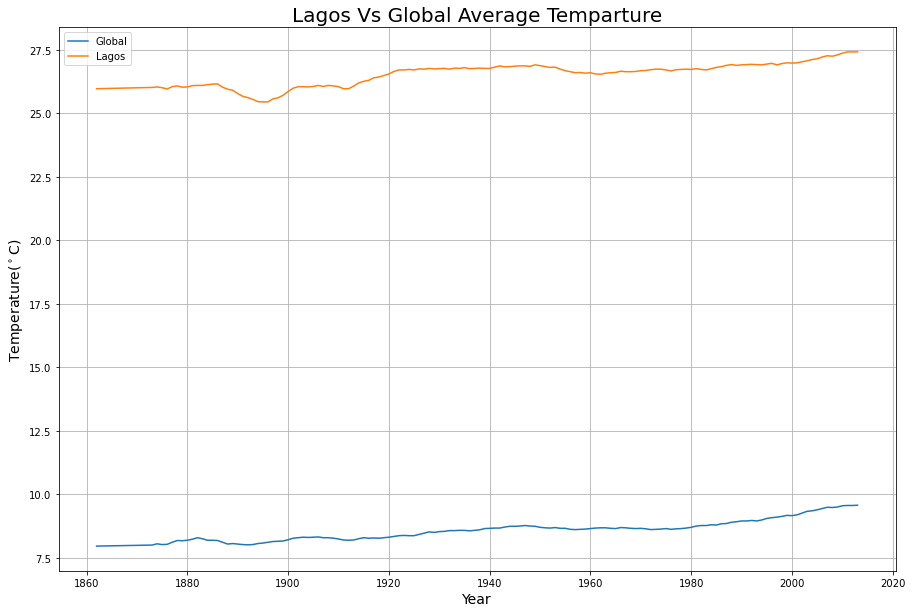

In [9]:
# matplotlib.rc_file_defaults() used to remove the effect of seaborn
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(year, global_temp, label='Global')
plt.plot(year, city_temp, label='Lagos')
plt.legend(loc=2)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Temperature($^\circ$C)",fontsize=14)
plt.title('Lagos Vs Global Average Temparture',fontsize=20)
# plt.tight_layout()


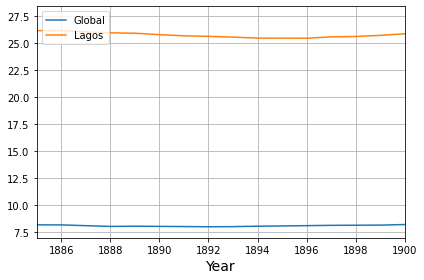

In [10]:

plt.grid(True)
plt.plot(year, global_temp, label='Global')
plt.plot(year, city_temp, label='Lagos')
plt.legend(loc=2)
plt.xlabel("Year",fontsize=14)
plt.xlim((1885, 1900))
plt.tight_layout()

### Observastion


In [11]:
print(global_temp.min())
print(global_temp.max())
print('\n')
print(city_temp.min())
print(city_temp.max())

7.95
9.56


25.45
27.42


In [12]:
df1_clean

,year,global_temp,city_temp,global_MA_10,city_MA_10
0,1849,7.98,25.98,NaN,NaN
1,1850,7.90,25.87,NaN,NaN
2,1851,8.18,26.10,NaN,NaN
7,1856,8.00,26.35,NaN,NaN
8,1857,7.76,25.45,NaN,NaN
...,...,...,...,...,...
160,2009,9.51,27.53,9.49,27.30
161,2010,9.70,27.79,9.54,27.37
162,2011,9.52,27.35,9.55,27.42
163,2012,9.51,27.15,9.55,27.42
